In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#Import Data :
data = pd.read_csv('kc_house_data.csv')


#1 . Dataset Description

This dataset is the well-known King County
House Prices Dataset, which contains information about houses sold in King County, USA.


In [8]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**1.1. Attributes (Columns)**

Common columns in this dataset include:

*   id — Unique house identifier
*   date — Date of sale
*   price — Target variable (house price)
*   bedrooms — Number of bedrooms
*   sqft_living — House size (interior)
*   sqft_lot — Land size
*   floors — Number of floors
*    waterfront — Is the house facing the water (0/1)
*  view — Quality of the view (0–4)
*   condition — House condition (1–5)
*   grade — Housing grade (1–13)
  * sqft_above — Size above ground
  * sqft_basement — Basement size
*  yr_built — Year the house was built
*  yr_renovated — Year renovated
*  zipcode — Postal code
*  lat — Latitude
*  long — Longitude
*  sqft_living15 — Living room size of nearby houses
*  sqft_lot15 — Lot size of nearby houses

In [9]:
data['price'].head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


**1.2 Target Variable**

👉 price :
 This is the value we want to predict.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**📘 1.3 Data Dictionary**

| Column          | Type        | Description              | Possible Values           |
|-----------------|-------------|---------------------------|----------------------------|
| id              | Integer     | Unique house identifier   | Unique number              |
| date            | String      | Sale date                 | yyyy-mm-dd                 |
| price           | Numeric     | Target — sale price       | continuous                 |
| bedrooms        | Numeric     | Number of bedrooms        | 0–10                       |
| bathrooms       | Numeric     | Number of bathrooms       | 0–8                        |
| sqft_living     | Numeric     | Interior size in ft²      | continuous                 |
| sqft_lot        | Numeric     | Lot size in ft²           | continuous                 |
| floors          | Numeric     | Number of floors          | 1–4                        |
| waterfront      | Categorical | Waterfront view           | 0 = No, 1 = Yes            |
| view            | Categorical | View rating               | 0–4                        |
| condition       | Categorical | House condition           | 1–5                        |
| grade           | Categorical | Construction grade        | 1–13                       |
| sqft_above      | Numeric     | Area above ground         | continuous                 |
| sqft_basement   | Numeric     | Basement area             | continuous                 |
| yr_built        | Numeric     | Construction year         | 1900–2015                  |
| yr_renovated    | Numeric     | Renovation year           | 0 = never                  |
| zipcode         | String      | Postal code               | e.g., 98001                |
| lat             | Numeric     | Latitude                  | coordinate                 |
| long            | Numeric     | Longitude                 | coordinate                 |
| sqft_living15   | Numeric     | Nearby house size         | continuous                 |
| sqft_lot15      | Numeric     | Nearby lot size          | continuous                 |


In [12]:

# Check for NULL values
print("🔍 NULL values in each column:")
print(data.isnull().sum())

# Check for EMPTY string values
print("\n🔍 EMPTY string values in each column:")
print((data == "").sum())

# Combined check (NULL + EMPTY)
print("\n🔍 Total missing values (NULL + EMPTY):")
missing = data.isnull().sum() + (data == "").sum()
print(missing)

# Summary
print("\n📌 Total missing values in the whole dataset =", missing.sum())

🔍 NULL values in each column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

🔍 EMPTY string values in each column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

🔍 Total missing values (NULL + EMPTY):
id               0
date             0
price            0
bedrooms  

In [13]:
# Number of first rows you want
N = 10

first_rows = data[['sqft_basement','yr_renovated']].head(N)
last_rows  = data[['sqft_basement','yr_renovated']].tail(10)

print(first_rows)
print("...")
print(last_rows)


   sqft_basement  yr_renovated
0              0             0
1            400          1991
2              0             0
3            910             0
4              0             0
5           1530             0
6              0             0
7              0             0
8            730             0
9              0             0
...
       sqft_basement  yr_renovated
21603              0             0
21604              0             0
21605              0             0
21606            910             0
21607            130             0
21608              0             0
21609              0             0
21610              0             0
21611              0             0
21612              0             0


 **1.4 Data Quality Analysis**

#### 🔍 **1. Missing Values Overview**

After analyzing the dataset:

- **No NULL values** were found in any column.  
- **No empty string values** were detected.  
- **Total missing values in the entire dataset = 0**

Although the dataset contains no formal missing values, some columns include **placeholder values (0)** that behave like missing data and must be treated carefully.

---

#### 📌 **2. Columns With Missing-Like Values**

#### **2.1 `sqft_basement`**
- Many rows contain **0**.
- A value of **0** may represent:
  - The house has **no basement**, or  
  - The basement size was **not recorded**.  
- This creates a mix of:
  - Valid basement sizes  
  - Missing-like placeholders  
- Must be handled as a special case before training the model.

---

##### **2.2 `yr_renovated`**
- Most values are **0**, except for a small percentage.
- Interpretation:
  - **0 = Never renovated**  
  - A non-zero value = Year of renovation  
- This column behaves like a **hybrid categorical feature**, not a continuous numeric attribute.

---

#### 📌 **3. Recommended Handling Strategy**

#### ✔ **For Numeric Features** (e.g., `sqft_basement`)
If treating **0 as missing**:
- Replace using the **median** value  
  **or**
- Create a binary indicator:
```
 basement_exists = 1 if sqft_basement > 0 else 0
```
This prevents the model from misinterpreting “0” as a valid size.

---

#### ✔ **For Categorical / Hybrid Features** (e.g., `yr_renovated`)
Transform into meaning categories:

| yr_renovated | New Meaning         |
|--------------|----------------------|
| 0            | Never Renovated      |
| > 0          | Renovated            |

Additionally, create a useful binary feature:
```
is_renovated = 1 if yr_renovated > 0 else 0
```

---

#### ✔ **Final Summary**
- The dataset contains **no official missing values**, but  
  **`sqft_basement`** and **`yr_renovated`** contain structural placeholders that act like missing data.  
- Proper handling improves model reliability and prevents misunderstanding of the data.  


##**Outliers Detection**
Possible outliers:

* Houses with > 10 bedrooms


* Houses priced above $5M


* Extremely large sqft_living (>10,000 ft²)


**Detection methods:**

* Boxplots Visualization


* IQR (Interquartile Range)


* Z-score

*  Boxplot for a Single Column


* Histogram + KDE (for distribution inspection)


In [14]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

## **```1. Outlier Detection using IQR Method :```**

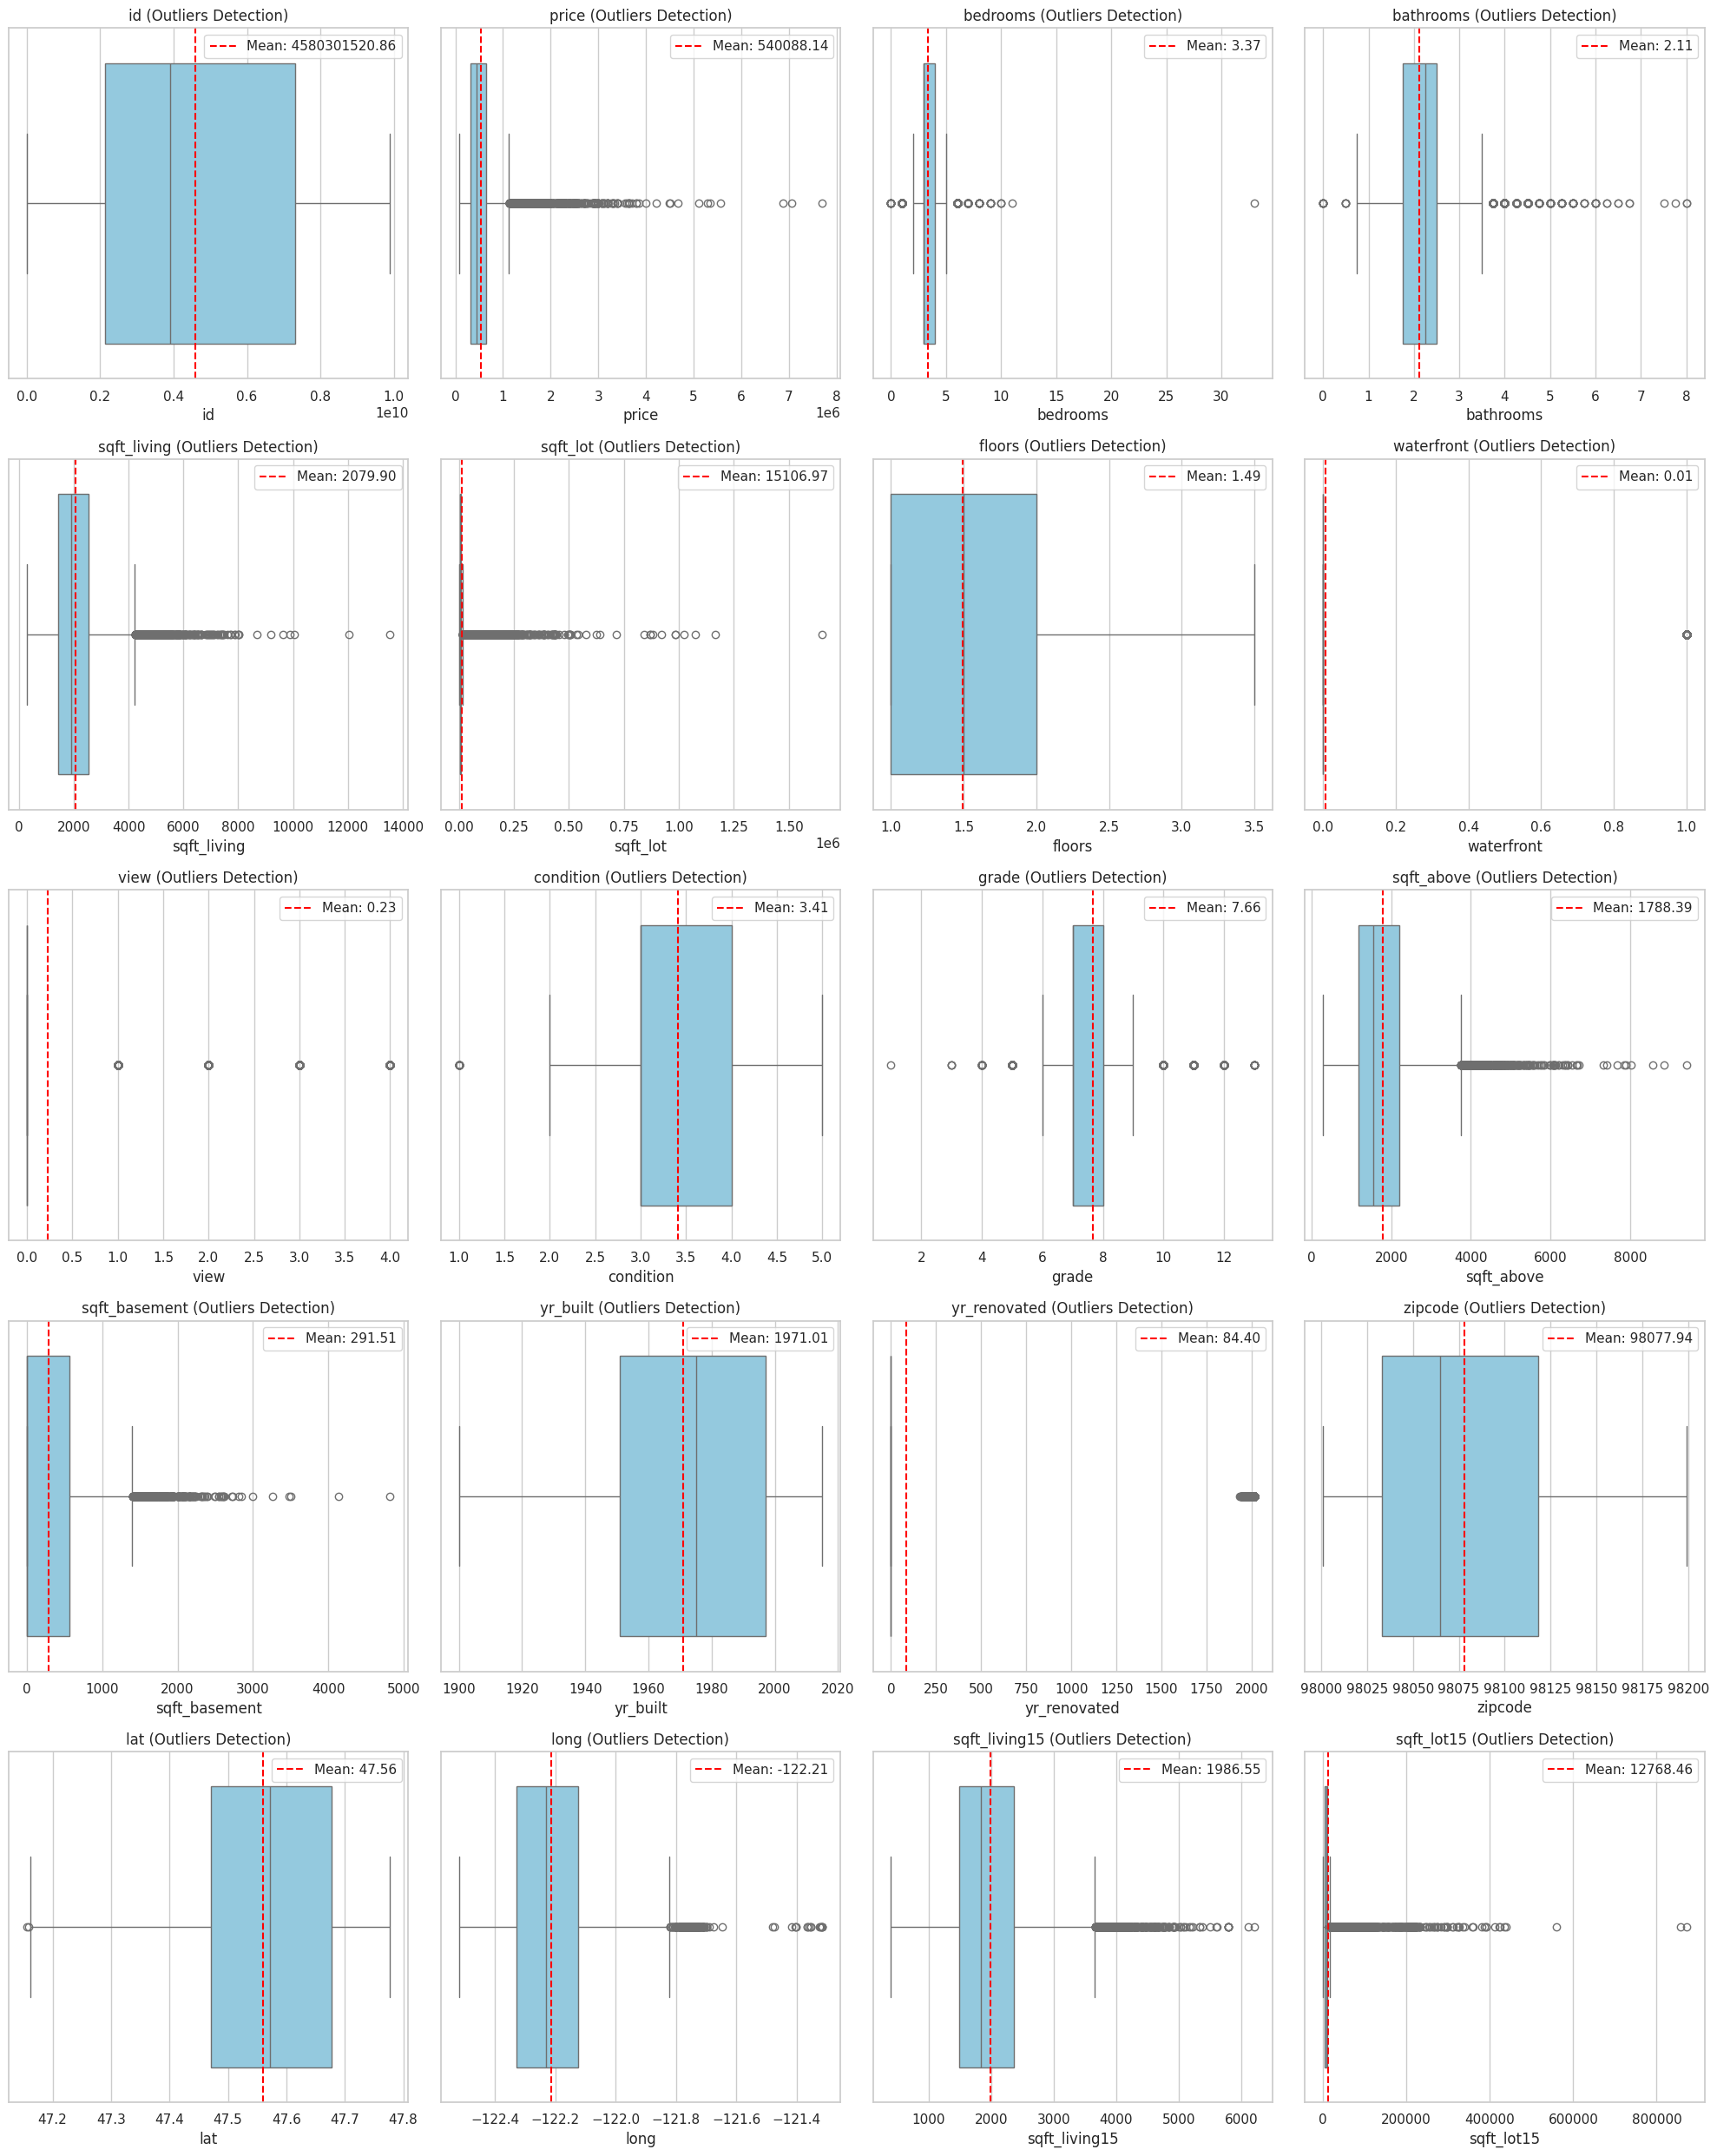

In [15]:

# Set style
sns.set(style="whitegrid")

# Number of columns per row
cols_per_row = 4
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / cols_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5*num_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} (Outliers Detection)", fontsize=12)
    axes[i].axvline(data[col].mean(), color='red', linestyle='--', label=f'Mean: {data[col].mean():.2f}')
    axes[i].legend()

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **```2. Outlier Detection using Z-Score :```**

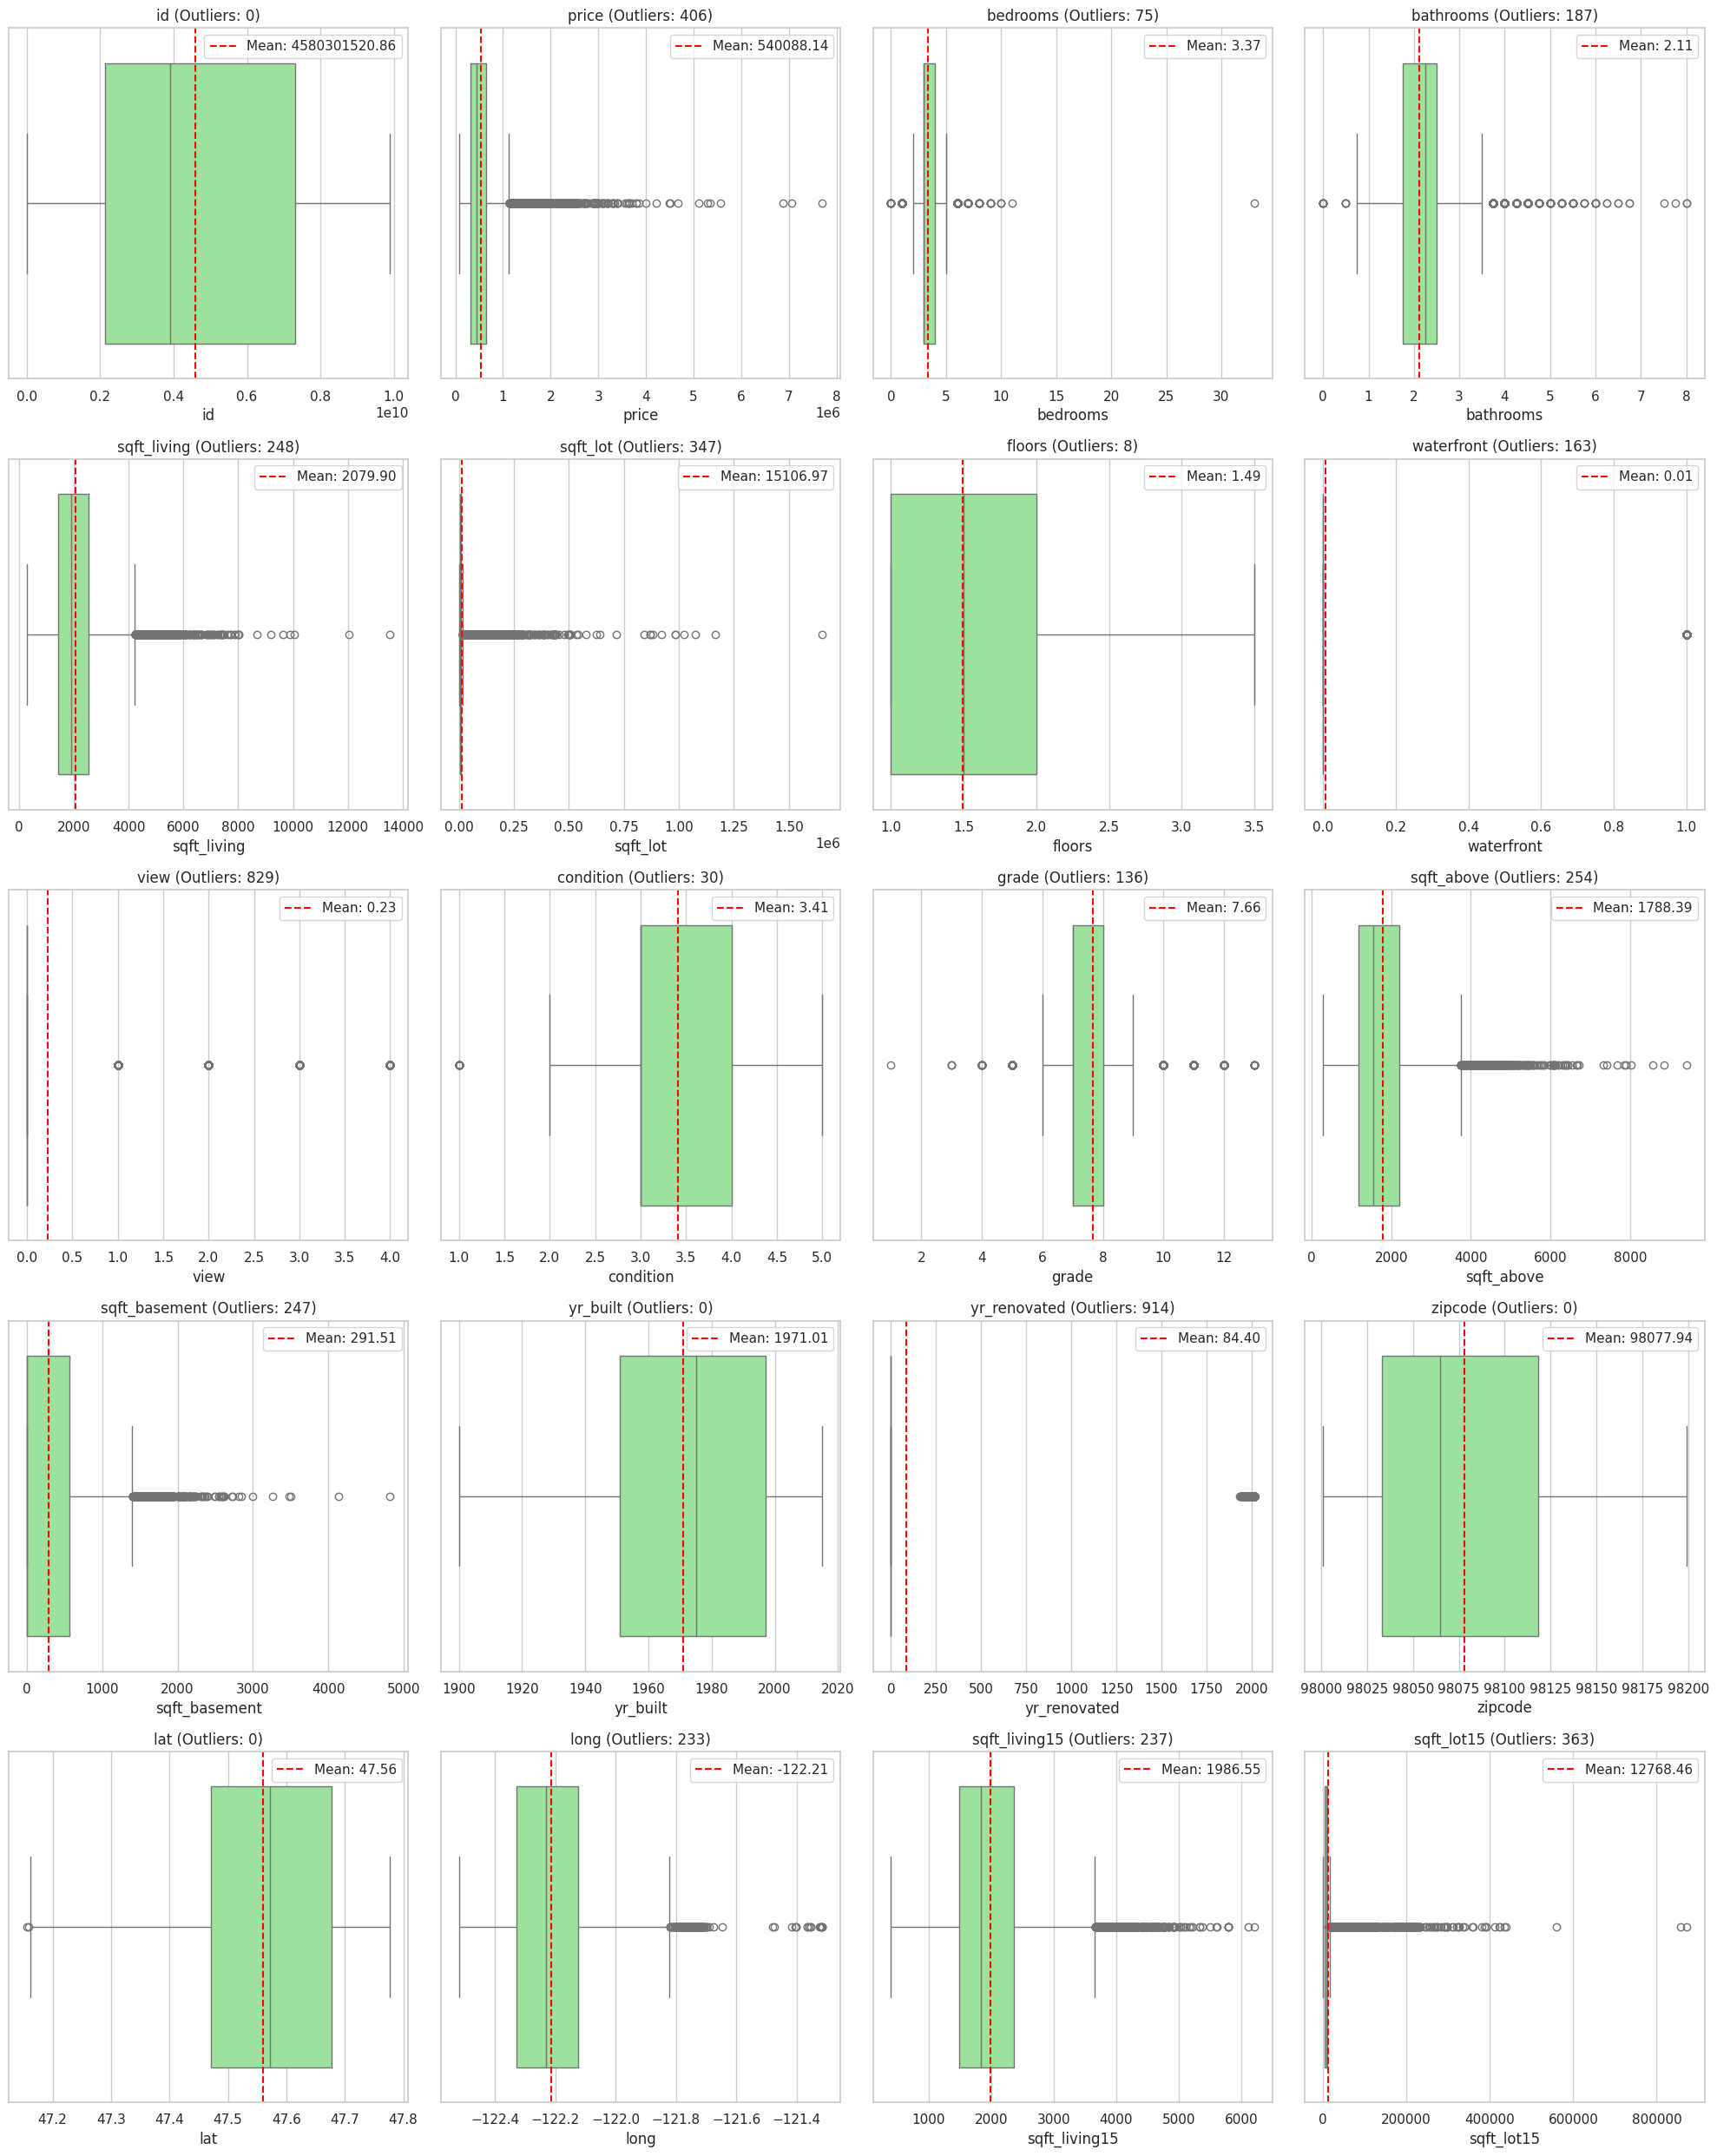

In [16]:

import math

sns.set(style="whitegrid")

# Threshold for Z-score
threshold = 3

cols_per_row = 4
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Calculate Z-scores
    z_scores = (data[col] - data[col].mean()) / data[col].std()
    outliers_count = (np.abs(z_scores) > threshold).sum()

    # Boxplot
    sns.boxplot(x=data[col], ax=axes[i], color='lightgreen')

    axes[i].set_title(f"{col} (Outliers: {outliers_count})", fontsize=12)
    axes[i].axvline(data[col].mean(), color='red', linestyle='--', label=f'Mean: {data[col].mean():.2f}')
    axes[i].legend()

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **```3. Outlier Detection using Boxplot Visualization :```**

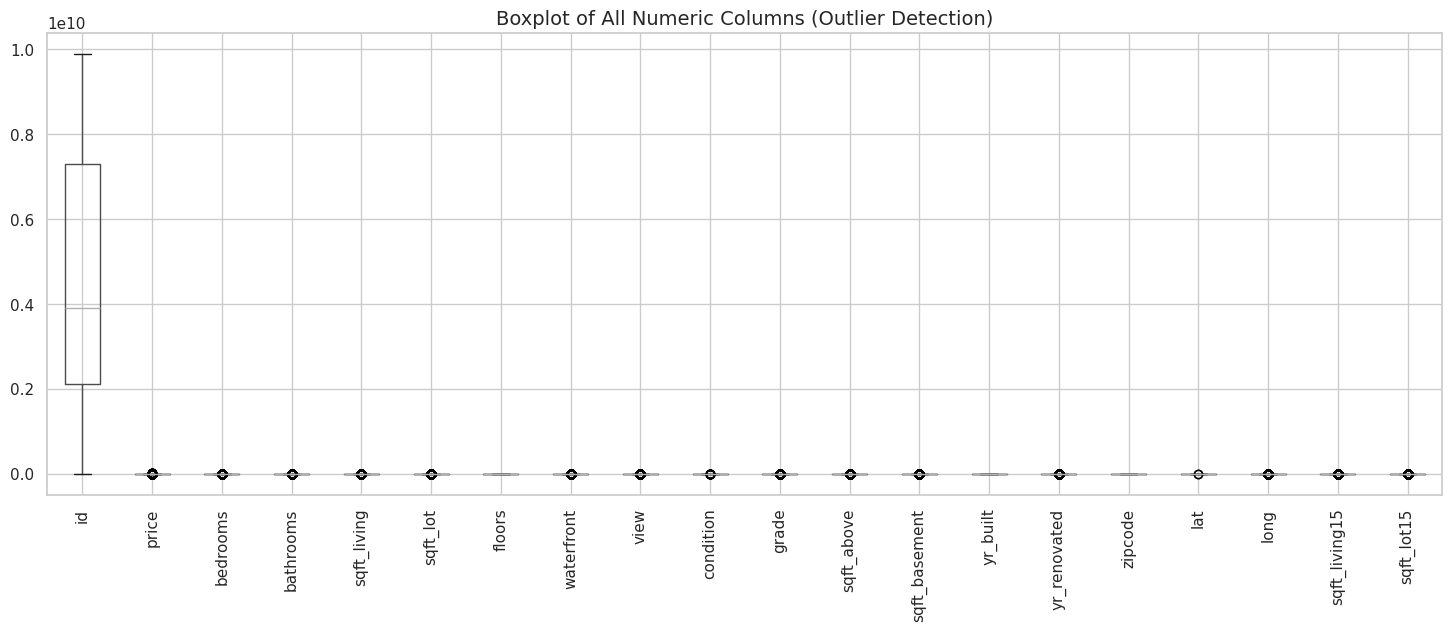

In [17]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Boxplot for all numeric columns
plt.figure(figsize=(18,6))
data[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of All Numeric Columns (Outlier Detection)", fontsize=14)
plt.show()


## **```4. Outlier Detection using Boxplot for a Single Column :```**

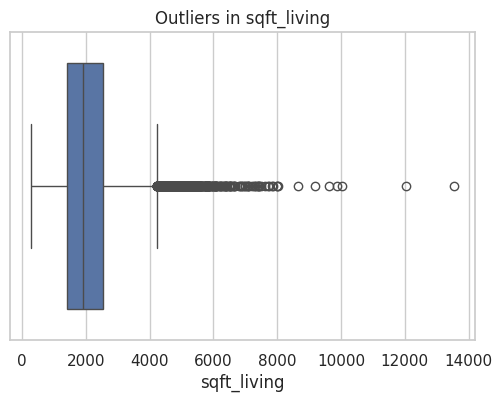

In [18]:
col = "sqft_living"   # choose any numeric column
plt.figure(figsize=(6, 4))
sns.boxplot(x=data[col])
plt.title(f"Outliers in {col}")
plt.show()


## **```5. Outlier Detection using Histogram + KDE (for distribution inspection) :```**

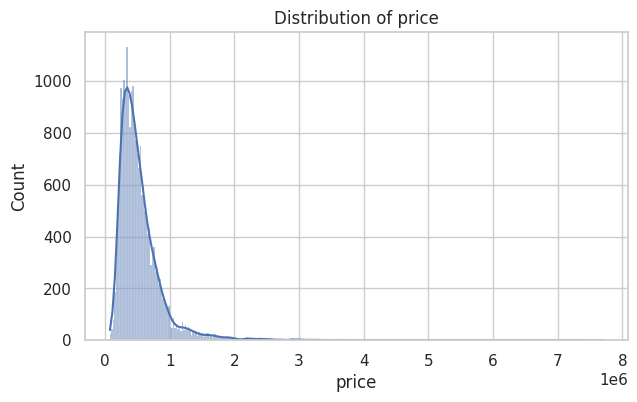

In [19]:
col = "price"  # choose any numeric feature
plt.figure(figsize=(7,4))
sns.histplot(data[col], kde=True)
plt.title(f"Distribution of {col}")
plt.show()
